# Compute PCA results for ABA

In [4]:
import numpy as np
import sklearn
from pca_with_missing_values import pca_with_missing_values
import ipyvolume
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import linear_sum_assignment
from utils import correlation_map_with_CCF

<hr />

## load the data

In [2]:
tmp = np.load('../data/mouse_brain_ISH_float32.npz')
data = tmp['data']
sections = tmp['sections']
original_shape = data.shape
d = data.shape[1] * data.shape[2] * data.shape[3]
data = np.reshape(data, (data.shape[0], d))

## Calculate PCA with missing data imputation

In [67]:
n_components = 18
pca = pca_with_missing_values(n_outer_loops = 1, n_components = n_components, random_state = 10)
coefs = pca.fit_transform(data)
PPs = pca.components_

MemoryError: 

## Save intermediate results

In [5]:
X_guess = pca.X_guess
np.savez('../data/pca_result_ncomp_'+str(n_components)+'.npz', PPs = PPs, coefs = coefs, X_guess = X_guess, data = data, original_shape = original_shape)

## load intermediate results

In [3]:
f = np.load('../data/pca_result_ncomp_18.npz')
coefs = f['coefs']
original_shape = f['original_shape']
X_guess = f['X_guess']
PPs = f['PPs']

<hr />

## sanity check

In [4]:
print('dimension of PPs: {} * {}'.format(PPs.shape[0], PPs.shape[1]))

dimension of PPs: 18 * 159326


In [5]:
print('dimension of X_guess: {} * {}'.format(X_guess.shape[0], X_guess.shape[1]))

dimension of X_guess: 4345 * 159326


In [6]:
print('original shape:', original_shape)

original shape: [4345   67   41   58]


<hr />

## Exploration

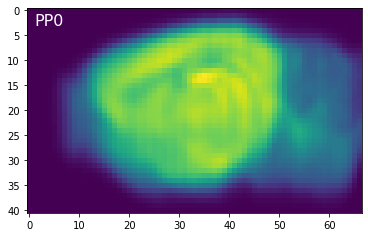

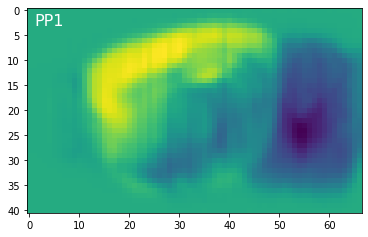

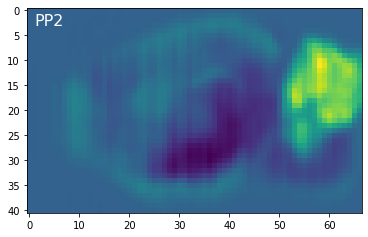

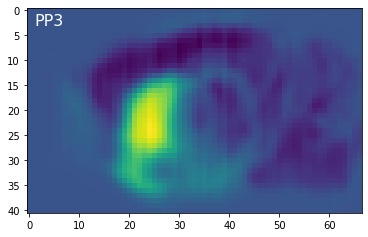

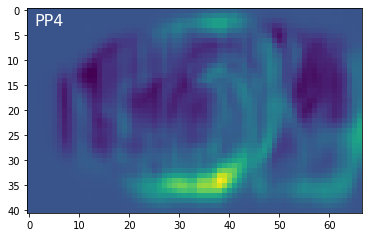

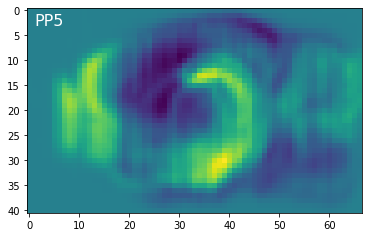

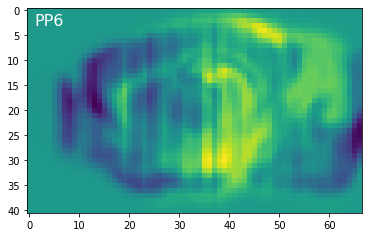

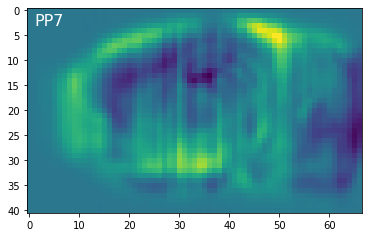

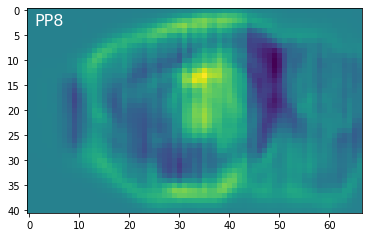

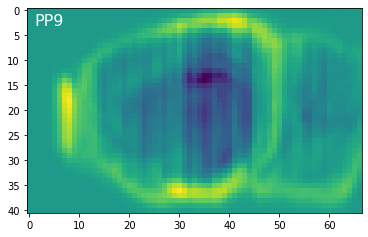

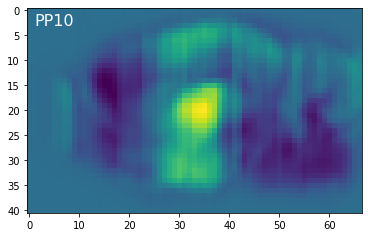

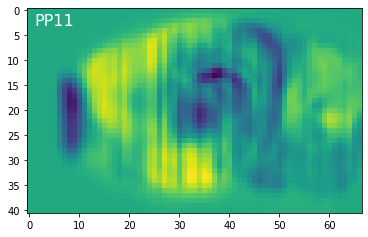

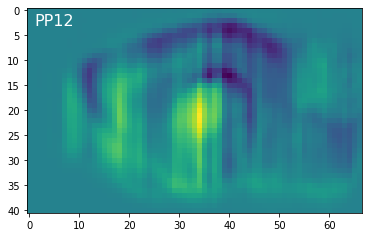

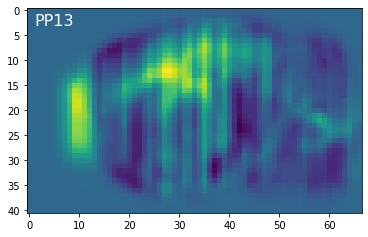

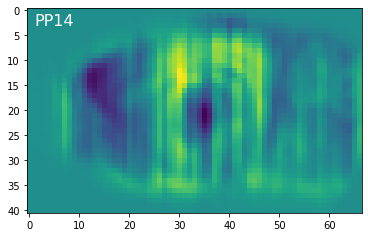

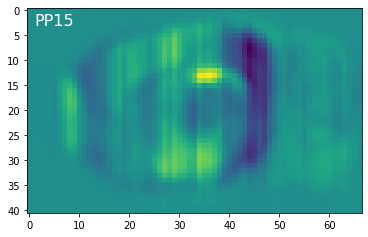

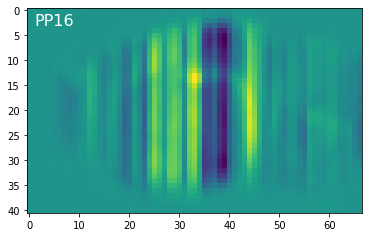

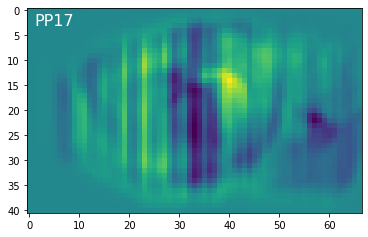

In [10]:
PPs_3d = np.zeros((18, 67, 41, 58))

for i in range(PPs.shape[0]):
    p2 = np.reshape(PPs[i,:], original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
#     plt.axis('off')
    plt.text(1,3,'PP'+str(i),fontsize=16, color='w')
    plt.show()
    PPs_3d[i,:,:,:] = p2

## load ABA coarse

In [11]:
import pandas as pd
areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_coarse_df')

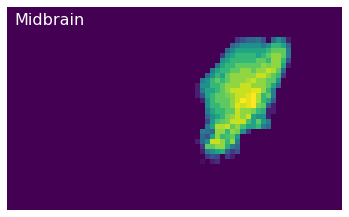

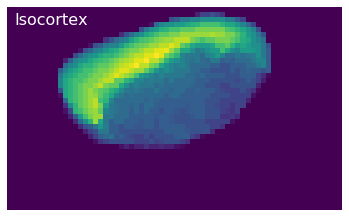

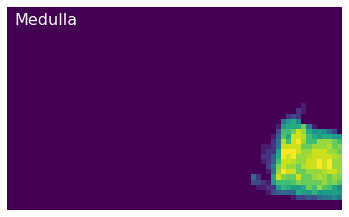

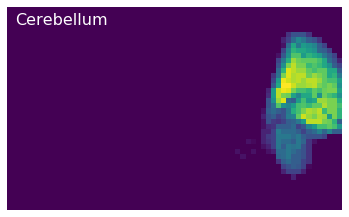

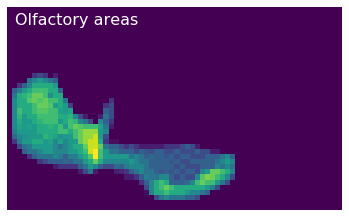

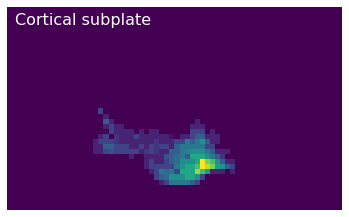

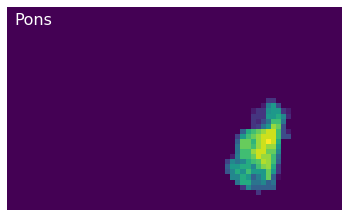

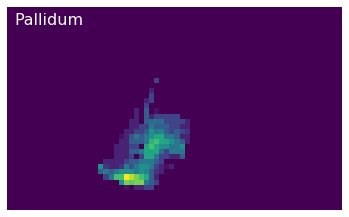

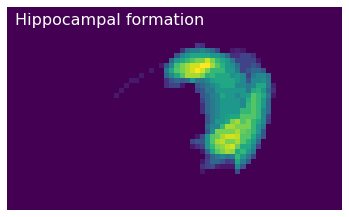

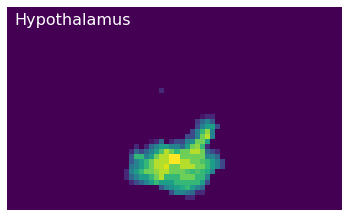

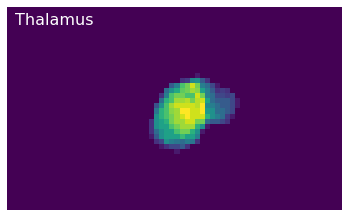

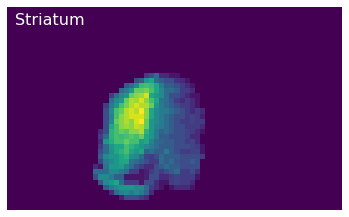

In [8]:
for i in range(12):
    plt.imshow(np.mean(areas_atlas[i,:,:,:],axis=2).T)
    plt.axis('off')
    plt.text(1,3,(mouse_coarse_df.iloc[i]['name']),fontsize=16, color='w')
    plt.show()

## Compute the correlation between ABA patterns and PPs learned via PCA

### correlation matrix of ABA patterns

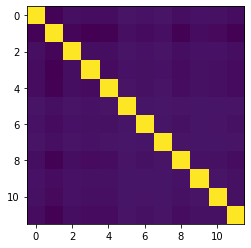

In [12]:
corr_ABA = np.corrcoef(areas_atlas.reshape(12, -1))
plt.imshow(corr_ABA)

## correlation between PCA patterns

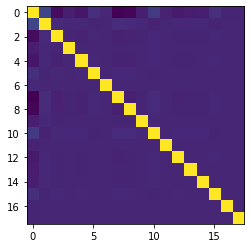

In [13]:
corr_PPs = np.corrcoef(PPs)
plt.imshow(corr_PPs)

### correlation between ABA patterns and PCA patterns

In [14]:
len(mouse_coarse_df.iloc[:]['name'].tolist())

12

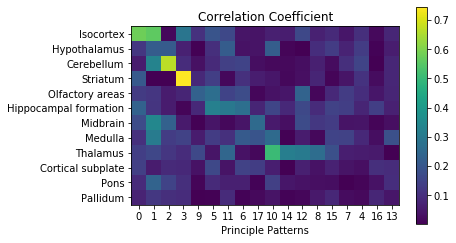

In [5]:
corr_mat = correlation_map_with_CCF(PPs, original_shape, order_type=2,area_order=[1,9,3,11,4,8,0,2,10,5,6,7], put_last_k=4)

### compare NMF with PCA patterns